In [64]:
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import env
from wordcloud import WordCloud
import nltk.sentiment

In [65]:
plt.rc('figure', figsize=(6, 4))

# Spam Data
 - Load the spam data set.


In [66]:
url = env.get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df0 = df.copy()
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [67]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean_stop(text,lemmy=True):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    if lemmy:
        return [wnl.lemmatize(word) for word in words if word not in stopwords]
    else:
        return [word for word in words if word not in stopwords]

In [68]:
df = df0.copy()
df["text"] = df["text"].apply(clean_stop).apply(" ".join)
df

,label,text
id,,
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif oni
2,spam,free entry wkly comp win fa cup final tkts 21s...
3,ham,dun say early hor c already say
4,ham,nah dont think go usf life around though
...,...,...
5567,spam,2nd time tried contact a750 pound prize claim ...
5568,ham,i_ b going esplanade fr home
5569,ham,pity mood soany suggestion


In [69]:
spam_bi_freq = pd.Series(list(nltk.ngrams(" ".join(df[df.label=="spam"]["text"]).split(),2))).value_counts()
ham_bi_freq = pd.Series(list(nltk.ngrams(" ".join(df[df.label=="ham"]["text"]).split(),2))).value_counts()
all_bi_freq = pd.Series(list(nltk.ngrams(" ".join(df["text"]).split(),2))).value_counts()
spam_bi_freq


(please, call)           44
(customer, service)      27
(po, box)                24
(a1000, cash)            23
(guaranteed, call)       23
                         ..
(extreme, dirty)          1
(listen, extreme)         1
(09090900040, listen)     1
(call, 09090900040)       1
(now1, 10p)               1
Length: 6886, dtype: int64

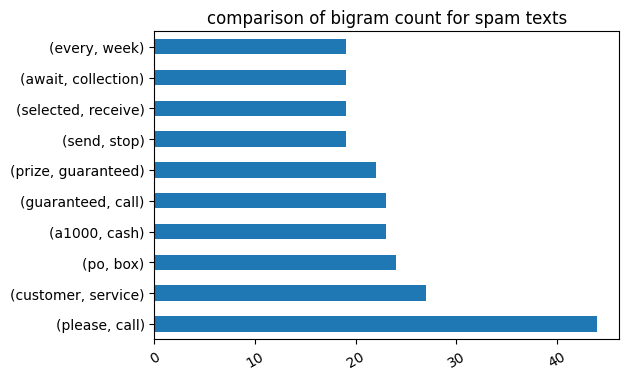

In [70]:
spam_bi_freq.head(10).plot.barh()
plt.title("comparison of bigram count for spam texts")
plt.xticks(rotation=30)
plt.show()

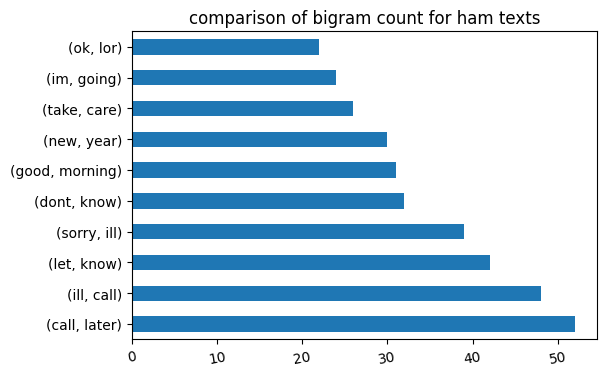

In [71]:
ham_bi_freq.head(10).plot.barh()
plt.title("comparison of bigram count for ham texts")
plt.xticks(rotation=10)
plt.show()

In [72]:
word_counts = pd.concat([ham_bi_freq,spam_bi_freq,all_bi_freq],axis=1).fillna(0).astype(int)
word_counts.columns = (["ham","spam","all"])
word_counts

,,ham,spam,all
call,later,52,0,52
ill,call,48,0,48
let,know,42,0,42
sorry,ill,39,0,39
dont,know,32,6,38
...,...,...,...,...
09058094594,seeing,0,0,1
nichols,secret,0,0,1
infowww100percentrealcom,watching,0,0,1
150ppm,way,0,0,1


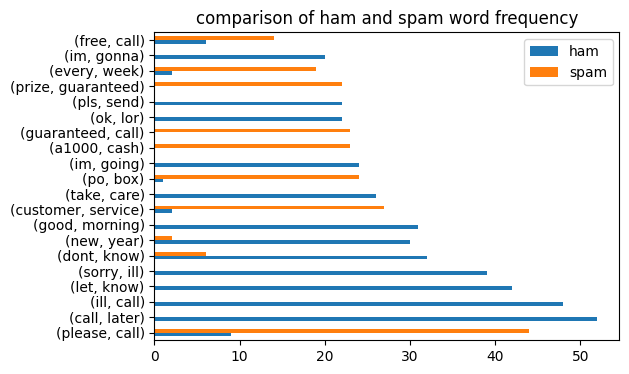

In [73]:
word_counts.sort_values("all",ascending=False)[["ham","spam"]].head(20).plot.barh(title=("comparison of ham and spam word frequency"))
plt.xticks(rotation=0)
plt.show()

Text(0.5, 1.0, 'most common bigram ham words')

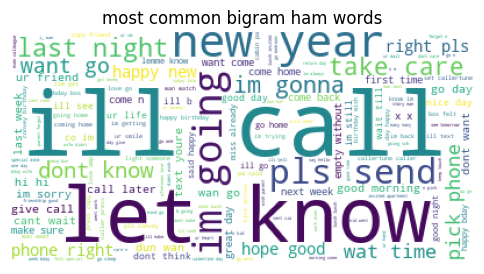

In [74]:
from wordcloud import WordCloud
img = WordCloud(background_color="white",collocation_threshold=1,collocations=True).generate("".join(df[df.label=="ham"]["text"]))
plt.imshow(img)
plt.axis("off")
plt.title("most common bigram ham words")

Text(0.5, 1.0, 'most common bigram spam words')

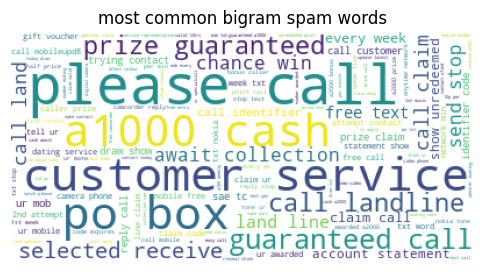

In [75]:
from wordcloud import WordCloud
img = WordCloud(background_color="white",collocation_threshold=1,collocations=True).generate("".join(df[df.label=="spam"]["text"]))
plt.imshow(img)
plt.axis("off")
plt.title("most common bigram spam words")

### Takeaways:
 - spam is more business oriented
 - ham is more personalable
 - spam is targeting an outcome with your action being the next step (please call)
 - ham is targeting an outcome informing you of a next step (i'll call)

- Is there any overlap in the bigrams for the spam data and the ham data?


### strong overlap in the territory of "call"

- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [76]:
spam_tri_freq = pd.Series(list(nltk.ngrams(" ".join(df[df.label=="spam"]["text"]).split(),3))).value_counts()
ham_tri_freq = pd.Series(list(nltk.ngrams(" ".join(df[df.label=="ham"]["text"]).split(),3))).value_counts()
spam_tri_freq,ham_tri_freq

((prize, guaranteed, call)     21
 (call, customer, service)     15
 (land, line, claim)           14
 (reply, call, 08000930705)    14
 (private, 2003, account)      13
                               ..
 (cw25wx, 150ppm, call)         1
 (326, cw25wx, 150ppm)          1
 (a5000, cash, await)           1
 (holiday, a5000, cash)         1
 (now1, 10p, per)               1
 Length: 8112, dtype: int64,
 (ill, call, later)      42
 (sorry, ill, call)      38
 (happy, new, year)      19
 (pls, send, message)    13
 (cant, pick, phone)     12
                         ..
 (far, knew, wasnt)       1
 (going, far, knew)       1
 (keep, going, far)       1
 (tag, keep, going)       1
 (rofl, true, name)       1
 Length: 35254, dtype: int64)

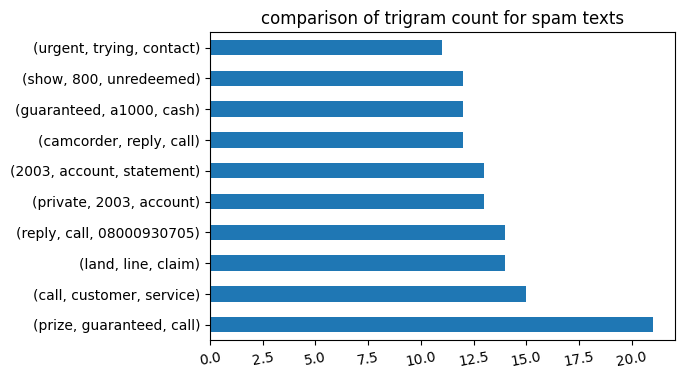

In [77]:
spam_tri_freq.head(10).plot.barh()
plt.title("comparison of trigram count for spam texts")
plt.xticks(rotation=10)
plt.show()

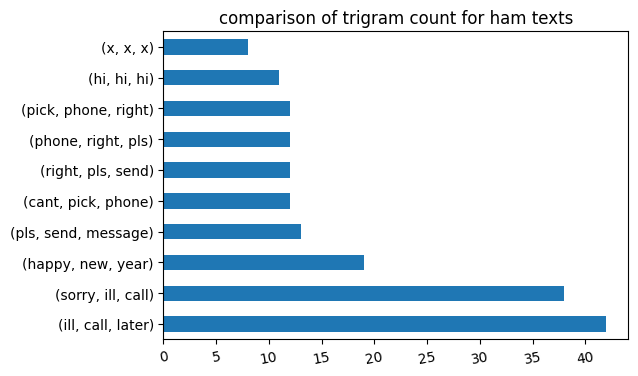

In [78]:
ham_tri_freq.head(10).plot.barh()
plt.title("comparison of trigram count for ham texts")
plt.xticks(rotation=10)
plt.show()

# Takeaway:
 - Largely what we saw with bigrams, ham is more personalble with the responses being informative rather than the spam with the respsonses being action items

# Explore the blog articles using the techniques discussed in the exploration lesson.

In [79]:
import acquire
import prepare

In [80]:
codeup_df,_ = prepare.basic_pipeline(codeup=True,news=False,words_keep=[],words_drop=[])
_,news_df = prepare.basic_pipeline(codeup=False,news=True,words_keep=["'"],words_drop=[])

removed  3211 words
removed  809 words
removed  290 words
removed  2073 words
removed  1885 words
removed  2536 words
removed  352 words
removed  329 words
removed  329 words
removed  308 words
removed  344 words
removed  304 words
removed  324 words
removed  306 words
removed  289 words
removed  337 words
removed  336 words
removed  331 words
removed  327 words
removed  333 words
removed  287 words
removed  334 words
removed  290 words
removed  339 words
removed  318 words
removed  320 words
removed  349 words
removed  312 words
removed  289 words
removed  323 words
removed  321 words
removed  290 words
removed  282 words
removed  319 words
removed  307 words
removed  297 words
removed  287 words
removed  240 words
removed  306 words
removed  275 words
removed  292 words
removed  269 words
removed  301 words
removed  318 words
removed  322 words
removed  317 words
removed  277 words
removed  270 words
removed  320 words
removed  313 words
removed  312 words
removed  298 words
removed 

In [81]:
codeup_df.head(3)

,title,original,clean,stemmed,lemmatized
0,Coding Bootcamp or Computer Science Degree?,"For many people, deciding between a coding boo...",many people deciding coding bootcamp computer ...,mani peopl decid code bootcamp comput scienc d...,many people deciding coding bootcamp computer ...
1,Diversity Equity and Inclusion Report,Codeup is excited to launch our first Diversit...,codeup excited launch first diversity equity i...,codeup excit launch first divers equiti inclus...,codeup excited launch first diversity equity i...
2,Codeup Honored as SABJ Diversity and Inclusion...,Codeup has been named the 2022 Diversity and I...,codeup named 2022 diversity inclusion award wi...,codeup name 2022 divers inclus award winner sa...,codeup named 2022 diversity inclusion award wi...


In [82]:
news_df.head(3)

,title,original,clean,stemmed,lemmatized
0,Bandhan Bank onboards Sourav Ganguly as brand ...,Bandhan Bank has announced Sourav Ganguly as i...,bandhan bank announced sourav ganguly brand am...,bandhan bank announc sourav ganguli brand amba...,bandhan bank announced sourav ganguly brand am...
1,Infosys let go of employees working for two co...,Infosys CEO Salil Parekh has revealed that the...,infosys ceo salil parekh revealed company let ...,infosi ceo salil parekh reveal compani let go ...,infosys ceo salil parekh revealed company let ...
2,Musk is under federal probe over his conduct i...,Twitter has claimed that the world's richest p...,twitter claimed world richest person elon musk...,twitter claim world richest person elon musk i...,twitter claimed world richest person elon musk...


In [83]:
codeup_wordlist = "".join(codeup_df["lemmatized"]).split()
news_wordlist = "".join(news_df["lemmatized"]).split()

In [84]:
code_mono_freq = pd.Series(codeup_wordlist).value_counts()
news_mono_freq = pd.Series(news_wordlist).value_counts()

code_bi_freq = pd.Series(list(nltk.ngrams(codeup_wordlist,2))).value_counts()
news_bi_freq = pd.Series(list(nltk.ngrams(news_wordlist,2))).value_counts()

code_tri_freq = pd.Series(list(nltk.ngrams(codeup_wordlist,3))).value_counts()
news_tri_freq = pd.Series(list(nltk.ngrams(news_wordlist,3))).value_counts()


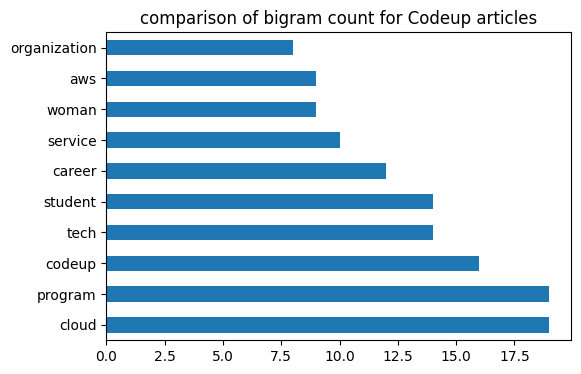

In [85]:
code_mono_freq.head(10).plot.barh()
plt.title("comparison of bigram count for Codeup articles")
plt.show()

### takeaway
 - large focus on offers and services

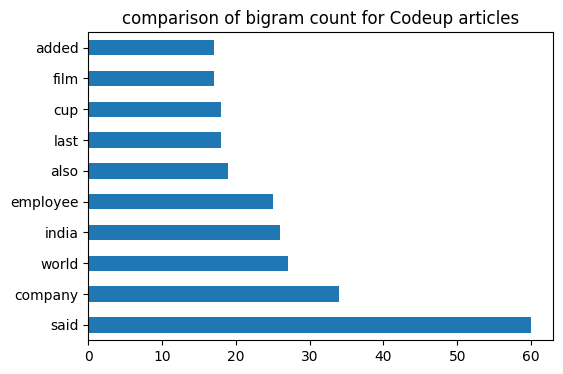

In [89]:
news_mono_freq.head(10).plot.barh()
plt.title("comparison of bigram count for Codeup articles")
plt.show()

### takeaway
 - a lot of reporting on quotes and business

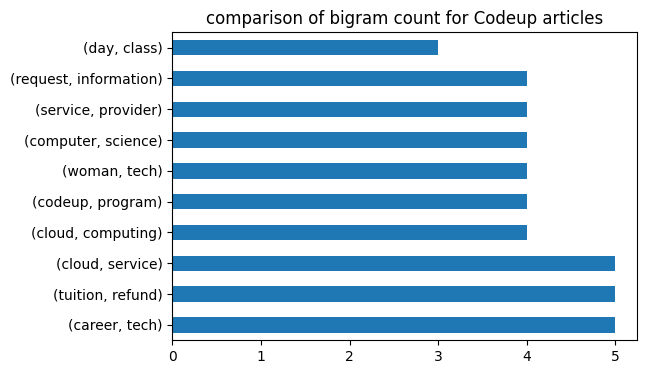

In [86]:
code_bi_freq.head(10).plot.barh()
plt.title("comparison of bigram count for Codeup articles")
plt.show()

### takeaway:
 - largely focused on their service (providing a career in tech through education)

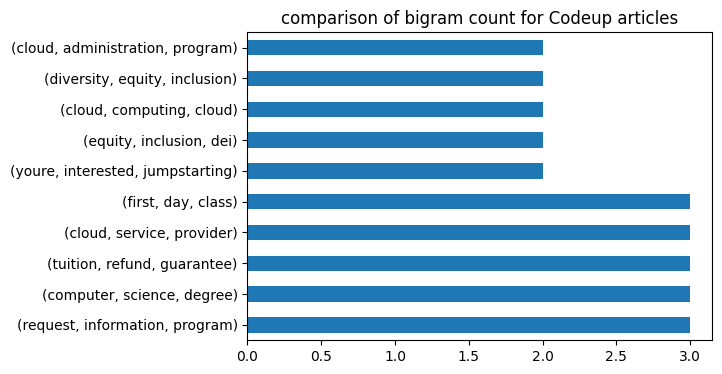

In [87]:
code_tri_freq.head(10).plot.barh()
plt.title("comparison of bigram count for Codeup articles")
plt.show()

### Takeaway:
 - similar to bigram takeaway

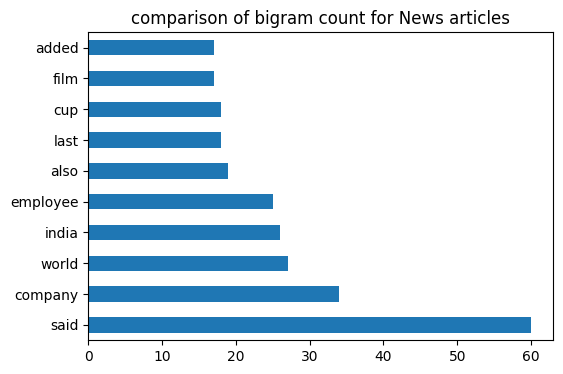

In [88]:
news_mono_freq.head(10).plot.barh()
plt.title("comparison of bigram count for News articles")
plt.show()